In [1]:
import numpy as np
A = np.array([          # Letter A
    0,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,1,
    1,0,0,0,1,
    1,0,0,0,1,
    0,0,0,0,0
])
B = np.array([          # Letter B
    1,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,0,
    0,0,0,0,0
])
C = np.array([          # Letter C
    0,1,1,1,1,
    1,0,0,0,0,
    1,0,0,0,0,
    1,0,0,0,0,
    0,1,1,1,1,
    0,0,0,0,0
])
X = np.array([A, B, C])  # Combine into training data  shape (3,30)
Y = np.array([            # Labels (one-hot encoding)
    [1,0,0],  # A
    [0,1,0],  # B
    [0,0,1]   # C
])

FORWARD PASS:
Multiply inputs by weights and add bias (Z = X·W + b).
Apply sigmoid activation: squashes values between 0 and 1.
Hidden layer output becomes input for the output layer.
Output layer produces predictions (A2) for each class.
This is called feedforward because information flows forward only.

In [2]:
# Network sizes
input_size = 30
hidden_size = 10
output_size = 3
np.random.seed(42)      # Random weight initialization
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sigmoid_derivative(z):
    return z * (1 - z)  # if z = sigmoid(z_input)
def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2


Input layer: Accepts 30 pixels (features) from the image.
Hidden layer: Learns patterns and relationships between pixels.
Output layer: Produces 3 values representing the probability of A, B, or C.

In [3]:
def compute_loss(Y, Y_hat):
    return np.mean((Y - Y_hat)**2)
def backward(X, Y, Z1, A1, Z2, A2, learning_rate=0.1):
    global W1, W2, b1, b2
    dA2 = A2 - Y            # Output layer error
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)  # Hidden layer error
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    W1 -= learning_rate * dW1    # Update weights
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


TRAINING LOOP

In [4]:
epochs = 10000
for i in range(epochs):
    Z1, A1, Z2, A2 = forward(X)
    loss = compute_loss(Y, A2)
    backward(X, Y, Z1, A1, Z2, A2, learning_rate=0.1)
    
    if i % 1000 == 0:
        print(f"Epoch {i}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.2512
Epoch 1000, Loss: 0.0068
Epoch 2000, Loss: 0.0017
Epoch 3000, Loss: 0.0010
Epoch 4000, Loss: 0.0006
Epoch 5000, Loss: 0.0005
Epoch 6000, Loss: 0.0004
Epoch 7000, Loss: 0.0003
Epoch 8000, Loss: 0.0003
Epoch 9000, Loss: 0.0002


TESTING THE MODEL

In [ ]:
def predict(x):
    _, _, _, A2 = forward(x)
    return np.argmax(A2, axis=1)
preds = predict(X)
print("Predicted classes:", preds)
print("Actual classes:   ", np.argmax(Y, axis=1))


In [ ]:
VISUALIZING THE INPUT LETTERS

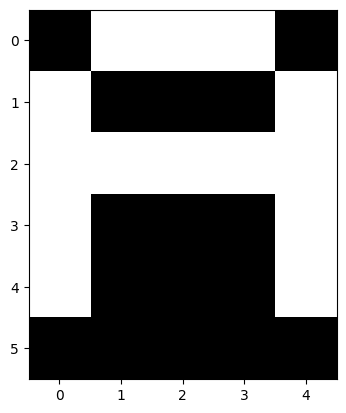

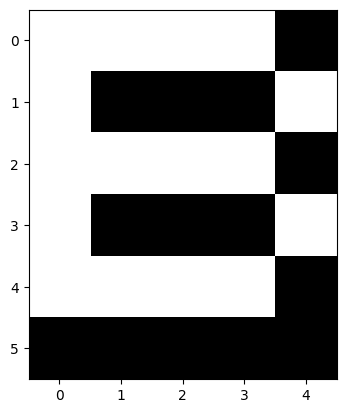

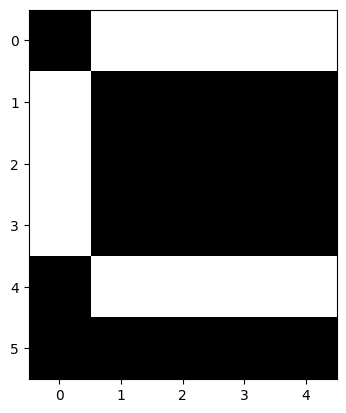

In [5]:
import matplotlib.pyplot as plt

def show_letter(x):
    plt.imshow(x.reshape(6,5), cmap='gray')
    plt.show()

show_letter(A)
show_letter(B)
show_letter(C)


PREDICT ACCURACY

In [ ]:
def predict(X):                     #    Predict the class index for each input sample X.
    # Forward pass
    Z1 = np.dot(X, W1) + b1
    A1 = 1 / (1 + np.exp(-Z1))          # sigmoid
    Z2 = np.dot(A1, W2) + b2
    A2 = 1 / (1 + np.exp(-Z2))          # sigmoid
    return np.argmax(A2, axis=1)
preds = predict(X)                  # predicted class indices
labels = np.argmax(Y, axis=1)       # actual class indices
accuracy = np.mean(preds == labels) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 100.00%
